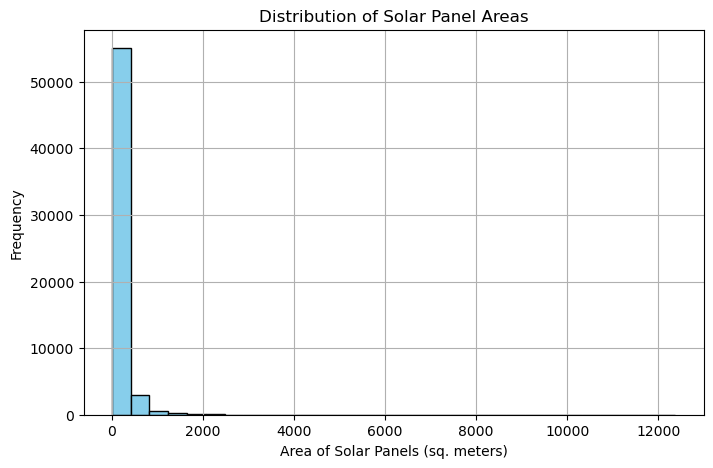

Total Solar Panel Instances: 59416
Mean Area: 190.10 sq. meters
Standard Deviation of Area: 619.62 sq. meters
Label Frequency: {1: 163, 2: 337, 3: 422, 4: 447, 5: 434, 6: 390, 7: 341, 8: 348, 9: 343, 10: 253, 11: 194, 12: 157, 13: 141, 14: 102, 15: 88, 16: 78, 17: 68, 18: 55, 19: 58, 20: 27, 21: 10, 22: 5, 23: 8, 24: 6, 25: 5, 26: 10, 27: 9, 28: 9, 29: 36, 30: 29, 31: 15, 32: 13, 33: 21, 34: 39, 35: 20, 36: 20, 37: 32, 38: 32, 39: 18, 40: 19, 41: 18, 42: 21, 43: 20, 44: 9, 45: 6, 46: 12, 47: 16, 48: 6, 49: 12, 50: 19, 51: 12, 52: 28, 53: 6, 54: 10, 55: 1, 56: 4, 57: 3, 58: 4, 59: 3, 60: 4, 61: 4, 62: 8, 63: 5, 64: 2, 65: 8, 66: 5, 67: 4, 68: 1, 69: 1, 70: 4, 71: 3, 72: 2, 73: 1, 74: 6, 75: 3, 76: 3, 77: 4, 78: 2, 79: 2}


In [67]:
""" 1. Load Dataset
2.Images are provided in 416x416 resolution.
3.Count the total instances of solar panels in the dataset.
4.Compute label frequency
5.Compute mean area and standard deviation.
6.Plot a histogram of the areas to observe distribution.
7.calculate area as mentioned in Readme file """
import os
import numpy as np
import matplotlib.pyplot as plt

def load_and_analyze_dataset(labels_folder):
    total_panels = 0
    label_counts = []
    areas = []

 
    TILE_GEOTRANSFORM = 0.31 

    for subfolder in ["labels_hd", "labels_native"]:
        subfolder_path = os.path.join(labels_folder, subfolder)

        if not os.path.exists(subfolder_path):
            print(f"Skipping missing folder: {subfolder_path}")
            continue

        for label_file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, label_file)

            if not os.path.isfile(file_path):
                continue  

            with open(file_path, 'r') as f:
                lines = f.readlines()
                num_panels = len(lines)
                total_panels += num_panels
                label_counts.append(num_panels)

                
                for line in lines:
                    parts = line.strip().split()
                    width, height = float(parts[3]), float(parts[4])

                  
                    width_m = width * 416 * TILE_GEOTRANSFORM
                    height_m = height * 416 * TILE_GEOTRANSFORM

                    area = width_m * height_m
                    areas.append(area)

    return total_panels, label_counts, np.array(areas)


LABELS_FOLDER =  r"C:\Users\HP\Downloads\labels1x" 
total_panels, label_counts, areas = load_and_analyze_dataset(LABELS_FOLDER)


mean_area = np.mean(areas)
std_area = np.std(areas)


plt.figure(figsize=(8, 5))
plt.hist(areas, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Area of Solar Panels (sq. meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Panel Areas')
plt.grid(True)
plt.show()


print(f"Total Solar Panel Instances: {total_panels}")
print(f"Mean Area: {mean_area:.2f} sq. meters")
print(f"Standard Deviation of Area: {std_area:.2f} sq. meters")
print(f"Label Frequency: {dict(zip(*np.unique(label_counts, return_counts=True)))}")


In [155]:
"""Compute IoU (Intersection over Union)"""
from shapely.geometry import box
import numpy as np
import supervision as sv  

def compute_iou_shapely(box1, box2):
    
    x1_min = box1[0] - box1[2] / 2
    y1_min = box1[1] - box1[3] / 2
    x1_max = box1[0] + box1[2] / 2
    y1_max = box1[1] + box1[3] / 2

    x2_min = box2[0] - box2[2] / 2
    y2_min = box2[1] - box2[3] / 2
    x2_max = box2[0] + box2[2] / 2
    y2_max = box2[1] + box2[3] / 2

    
    bbox1 = box(x1_min, y1_min, x1_max, y1_max)
    bbox2 = box(x2_min, y2_min, x2_max, y2_max)

  
    intersection = bbox1.intersection(bbox2).area
    union = bbox1.union(bbox2).area

    return intersection / union if union > 0 else 0


box1 = [50, 50, 20, 20] 
box2 = [55, 55, 20, 20]

iou_shapely = compute_iou_shapely(box1, box2)
print(iou_shapely)




0.391304347826087


In [159]:
"""Compute Average Precision (AP)"""
def compute_ap_voc_11point(recalls, precisions):
   
    recall_levels = np.linspace(0, 1, 11)
    ap = 0.0

    for r in recall_levels:
        p = max([precisions[i] for i in range(len(recalls)) if recalls[i] >= r], default=0)
        ap += p / 11  

    return ap


recalls = [0, 0.1, 0.3, 0.5, 0.7, 1.0]
precisions = [1, 0.9, 0.8, 0.6, 0.5, 0.3]
ap_voc = compute_ap_voc_11point(recalls, precisions)
print(ap_voc)


0.5636363636363636


In [161]:
"""Compute Average Precision (AP)"""
def compute_ap_coco_101point(recalls, precisions):
   
    recall_levels = np.linspace(0, 1, 101)
    ap = 0.0

    for r in recall_levels:
        p = max([precisions[i] for i in range(len(recalls)) if recalls[i] >= r], default=0)
        ap += p / 101  

    return ap

ap_coco = compute_ap_coco_101point(recalls, precisions)
print(ap_coco)


0.5623762376237628


In [163]:
"""AP calculations """
from sklearn.metrics import auc

def compute_ap_auc(recalls, precisions):

    return auc(recalls, precisions)

ap_auc = compute_ap_auc(np.array(recalls), np.array(precisions))
print(ap_auc)


0.635


In [1]:
"""Model Building & Evaluation"""
from ultralytics import YOLO


model = YOLO("yolov8n.pt") 


model.train(data=r"C:\Users\HP\Downloads\solar_dataset\solar_dataset.yaml",  epochs=50,imgsz=416,batch=16, )
   


Ultralytics 8.3.70  Python-3.11.7 torch-2.5.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\HP\Downloads\solar_dataset\solar_dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning C:\Users\HP\Downloads\solar_dataset\train\labels.cache... 2034 images, 9 backgrounds, 198 corrupt: 100%|██████████| 2043/2043 [00:00<?, ?it/s]

train: WARNING  C:\Users\HP\Downloads\solar_dataset\train\images\solarpanels_native_1__x0_7374_y0_9622_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  C:\Users\HP\Downloads\solar_dataset\train\images\solarpanels_native_1__x0_7438_y0_9843_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  C:\Users\HP\Downloads\solar_dataset\train\images\solarpanels_native_1__x0_7474_y0_9842_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  C:\Users\HP\Downloads\solar_dataset\train\images\solarpanels_native_1__x0_7511_y0_9647_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  C:\Users\HP\Downloads\solar_dataset\train\images\solarpanels_native_1__x0_7603_y0_9742_dxdy_416.


val: Scanning C:\Users\HP\Downloads\solar_dataset\val\labels.cache... 254 images, 1 backgrounds, 9 corrupt: 100%|██████████| 255/255 [00:00<?, ?it/s]

val: WARNING  C:\Users\HP\Downloads\solar_dataset\val\images\solarpanels_native_1__x0_2270_y0_8179_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  C:\Users\HP\Downloads\solar_dataset\val\images\solarpanels_native_1__x0_2300_y0_8080_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  C:\Users\HP\Downloads\solar_dataset\val\images\solarpanels_native_1__x0_2309_y0_8071_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  C:\Users\HP\Downloads\solar_dataset\val\images\solarpanels_native_1__x0_2311_y0_8124_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  C:\Users\HP\Downloads\solar_dataset\val\images\solarpanels_native_1__x0_2344_y0_8184_dxdy_416.tif: ignoring corrup

Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       1.79      1.829      1.275         76        416: 100%|██████████| 116/116 [03:56<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]

                   all        246       1750       0.49       0.39      0.358      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.504      1.111      1.138         63        416: 100%|██████████| 116/116 [03:44<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.74s/it]

                   all        246       1750      0.545      0.536      0.533       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.449      1.029      1.108        158        416: 100%|██████████| 116/116 [03:30<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]

                   all        246       1750       0.68      0.618      0.654      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.362      0.923      1.078         78        416: 100%|██████████| 116/116 [03:41<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]

                   all        246       1750      0.615      0.527       0.58      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.335     0.8744      1.076        141        416: 100%|██████████| 116/116 [03:34<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        246       1750       0.65      0.549      0.547       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.304     0.8508      1.057         72        416: 100%|██████████| 116/116 [03:34<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]

                   all        246       1750      0.544      0.606      0.561      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.255     0.8142      1.042         78        416: 100%|██████████| 116/116 [03:26<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]

                   all        246       1750       0.67      0.634      0.631      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.229     0.7842      1.044         91        416: 100%|██████████| 116/116 [03:37<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]

                   all        246       1750      0.677        0.6      0.622      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.221     0.7609      1.029        121        416: 100%|██████████| 116/116 [03:30<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]

                   all        246       1750      0.739      0.562      0.631      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.201     0.7498      1.015         86        416: 100%|██████████| 116/116 [03:20<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

                   all        246       1750      0.656      0.656      0.662      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.153     0.7078          1         51        416: 100%|██████████| 116/116 [03:19<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

                   all        246       1750      0.701      0.634      0.659      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.149     0.7021      1.005        156        416: 100%|██████████| 116/116 [03:21<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]

                   all        246       1750      0.725      0.646      0.678      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.153     0.7012     0.9944        110        416: 100%|██████████| 116/116 [03:39<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        246       1750      0.556      0.599      0.529      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.119     0.6757      0.991         91        416: 100%|██████████| 116/116 [03:31<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]

                   all        246       1750      0.681      0.682      0.692      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.093     0.6613     0.9827        166        416: 100%|██████████| 116/116 [03:27<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]

                   all        246       1750      0.703      0.643      0.665      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.082     0.6589     0.9762         47        416: 100%|██████████| 116/116 [03:32<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]

                   all        246       1750      0.738      0.674      0.729      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.06     0.6341     0.9672        107        416: 100%|██████████| 116/116 [03:35<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]

                   all        246       1750      0.745      0.643      0.695       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.039      0.627     0.9621         54        416: 100%|██████████| 116/116 [03:33<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        246       1750      0.741      0.703      0.722      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.054     0.6312     0.9668         64        416: 100%|██████████| 116/116 [03:33<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]

                   all        246       1750       0.72      0.693      0.687      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.052     0.6306     0.9649         50        416: 100%|██████████| 116/116 [03:25<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        246       1750      0.726      0.691       0.71      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G       1.05     0.6241     0.9617        104        416: 100%|██████████| 116/116 [03:20<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

                   all        246       1750      0.767      0.691      0.708      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G       1.01     0.6075     0.9579         81        416: 100%|██████████| 116/116 [03:21<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        246       1750      0.762      0.696      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.9985     0.6004      0.957         87        416: 100%|██████████| 116/116 [03:20<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]

                   all        246       1750      0.739      0.659      0.672      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.9936     0.5892      0.948         50        416: 100%|██████████| 116/116 [03:25<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        246       1750       0.73      0.717      0.723      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.004     0.5942     0.9437         98        416: 100%|██████████| 116/116 [03:36<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        246       1750      0.751      0.687      0.686      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.9751     0.5797     0.9391         88        416: 100%|██████████| 116/116 [03:34<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        246       1750      0.732      0.705      0.696      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.9963     0.5888     0.9456         48        416: 100%|██████████| 116/116 [03:28<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]

                   all        246       1750      0.756      0.726      0.758      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.9534      0.569     0.9296        127        416: 100%|██████████| 116/116 [03:20<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]

                   all        246       1750      0.719      0.688      0.691      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      0.946     0.5644     0.9368         60        416: 100%|██████████| 116/116 [03:19<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]

                   all        246       1750      0.758      0.687      0.727      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.9609     0.5691     0.9326         53        416: 100%|██████████| 116/116 [03:20<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        246       1750      0.727      0.683      0.736      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9232     0.5475     0.9276        127        416: 100%|██████████| 116/116 [03:41<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]

                   all        246       1750       0.74      0.713      0.729      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.9232     0.5479     0.9296         82        416: 100%|██████████| 116/116 [03:36<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]

                   all        246       1750       0.74      0.712      0.712      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.9341      0.549     0.9308         57        416: 100%|██████████| 116/116 [03:40<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]

                   all        246       1750      0.737      0.741      0.744      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8918     0.5312     0.9209        185        416: 100%|██████████| 116/116 [03:40<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        246       1750      0.728      0.701      0.716      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.8979     0.5308     0.9154         63        416: 100%|██████████| 116/116 [03:25<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]

                   all        246       1750      0.785      0.725      0.741       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      0.867      0.517     0.9137         39        416: 100%|██████████| 116/116 [03:36<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]

                   all        246       1750      0.755      0.714      0.719      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.8894     0.5265     0.9168        129        416: 100%|██████████| 116/116 [03:39<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        246       1750      0.754      0.724      0.726      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.8705     0.5142      0.907         50        416: 100%|██████████| 116/116 [03:43<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.42s/it]

                   all        246       1750      0.772      0.731      0.758      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.8562     0.5096     0.9081         58        416: 100%|██████████| 116/116 [03:26<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

                   all        246       1750       0.75      0.712      0.726      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.8717     0.5184     0.9113         69        416: 100%|██████████| 116/116 [03:22<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

                   all        246       1750       0.72      0.714      0.724      0.442


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.7863     0.4726     0.8891         60        416: 100%|██████████| 116/116 [03:16<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

                   all        246       1750       0.77      0.727      0.743      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7666     0.4575     0.8841         30        416: 100%|██████████| 116/116 [03:17<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.41s/it]

                   all        246       1750      0.732      0.731      0.735      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.7633     0.4549     0.8844         36        416: 100%|██████████| 116/116 [03:18<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

                   all        246       1750      0.728      0.708      0.711      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.7467     0.4503     0.8812         62        416: 100%|██████████| 116/116 [03:27<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]

                   all        246       1750       0.75      0.704      0.734      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      0.743     0.4442     0.8794         34        416: 100%|██████████| 116/116 [03:37<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]

                   all        246       1750      0.768       0.69      0.723      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      0.722     0.4361     0.8722         75        416: 100%|██████████| 116/116 [03:22<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]

                   all        246       1750      0.762      0.721      0.733      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.7202     0.4354     0.8724         31        416: 100%|██████████| 116/116 [03:33<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.50s/it]

                   all        246       1750      0.743        0.7      0.704      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.7069     0.4268       0.87         28        416: 100%|██████████| 116/116 [03:20<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]

                   all        246       1750      0.761      0.707      0.714      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7014     0.4248     0.8688         26        416: 100%|██████████| 116/116 [03:26<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.44s/it]

                   all        246       1750      0.741      0.719      0.719      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.6873     0.4201     0.8654         36        416: 100%|██████████| 116/116 [03:27<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.41s/it]

                   all        246       1750       0.76      0.701      0.717      0.437



50 epochs completed in 3.089 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.70  Python-3.11.7 torch-2.5.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


                   all        246       1750       0.77      0.731      0.757      0.469
Speed: 0.9ms preprocess, 32.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002B72A9A9150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [9]:
"""Model Predictions & Visualization"""
model.predict(r"C:\Users\HP\Downloads\solar_dataset\test\images\solarpanels_native_1__x0_0_y0_6845_dxdy_416.TIF", save=True, conf=0.5)



image 1/1 C:\Users\HP\Downloads\solar_dataset\test\images\solarpanels_native_1__x0_0_y0_6845_dxdy_416.TIF: 416x416 7 solar_panels, 179.1ms
Speed: 5.3ms preprocess, 179.1ms inference, 13.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'solar_panel'}
 obb: None
 orig_img: array([[[125, 134, 146],
         [120, 130, 142],
         [122, 132, 144],
         ...,
         [ 97, 104, 106],
         [ 92,  99, 101],
         [ 99, 107, 109]],
 
        [[126, 135, 147],
         [125, 134, 146],
         [126, 136, 148],
         ...,
         [ 92, 100, 102],
         [ 99, 106, 109],
         [ 98, 105, 108]],
 
        [[126, 136, 147],
         [130, 140, 152],
         [128, 137, 149],
         ...,
         [ 97, 104, 106],
         [ 99, 105, 108],
         [105, 112, 115]],
 
        ...,
 
        [[117, 123, 133],
         [114, 120, 130],
         [111, 117, 125],
         ...,
         [ 73,  71,  85],
         [ 75,  74,  86],
         [ 65,  64,  76]],
 
        [[115, 121, 131],
         [112, 118, 128],
         [114, 120, 130],
         ...,
         [ 68

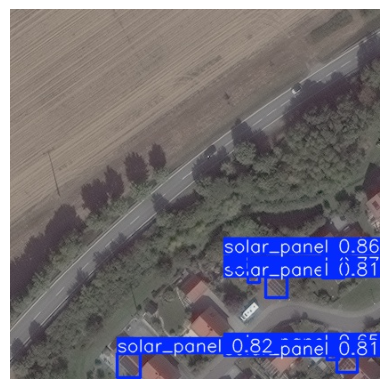

In [7]:
"""Model Predictions & Visualization"""
import matplotlib.pyplot as plt
import cv2


image_path = r"C:\Users\HP\runs\detect\train54\solarpanels_native_1__x0_0_y0_6845_dxdy_416.jpg"
image = cv2.imread(image_path)  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


plt.imshow(image)
plt.axis("off")  
plt.show()



Image: solarpanels_native_1__x0_2208_y0_7134_dxdy_416.jpg | Shape: 416x416
✅ Found label file: C:\Users\HP\Downloads\iloveimg-converted\labels1\solarpanels_native_1__x0_2208_y0_7134_dxdy_416.txt

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2208_y0_7134_dxdy_416.jpg: 416x416 1 solar_panel, 37.0ms
Speed: 1.0ms preprocess, 37.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


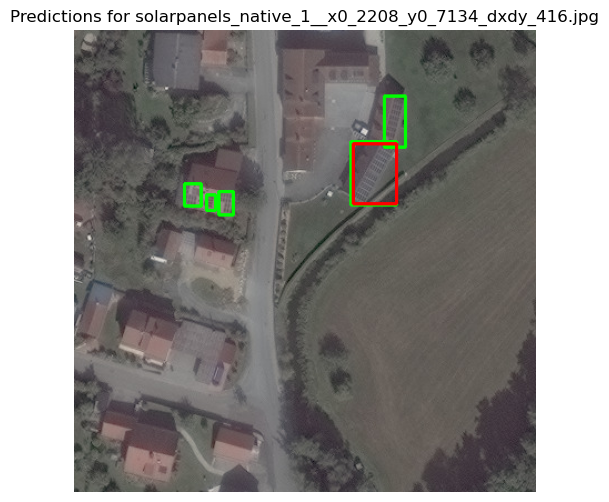

Image: solarpanels_native_1__x0_2379_y0_6385_dxdy_416.jpg | Shape: 416x416
✅ Found label file: C:\Users\HP\Downloads\iloveimg-converted\labels1\solarpanels_native_1__x0_2379_y0_6385_dxdy_416.txt

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2379_y0_6385_dxdy_416.jpg: 416x416 1 solar_panel, 36.0ms
Speed: 1.0ms preprocess, 36.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)


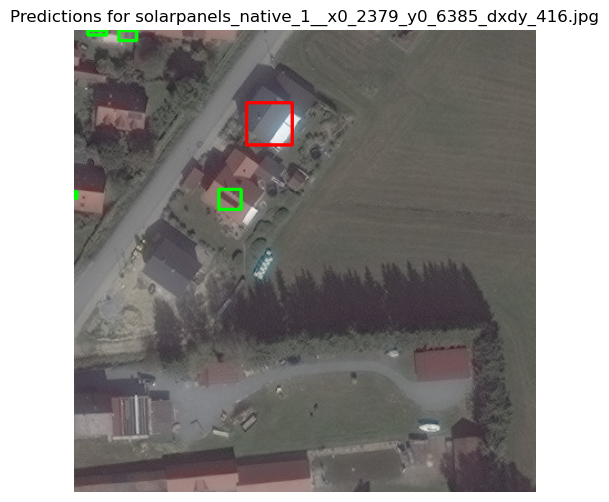

Image: solarpanels_native_1__x0_2270_y0_6830_dxdy_416.jpg | Shape: 416x416
✅ Found label file: C:\Users\HP\Downloads\iloveimg-converted\labels1\solarpanels_native_1__x0_2270_y0_6830_dxdy_416.txt

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2270_y0_6830_dxdy_416.jpg: 416x416 1 solar_panel, 32.3ms
Speed: 1.1ms preprocess, 32.3ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)


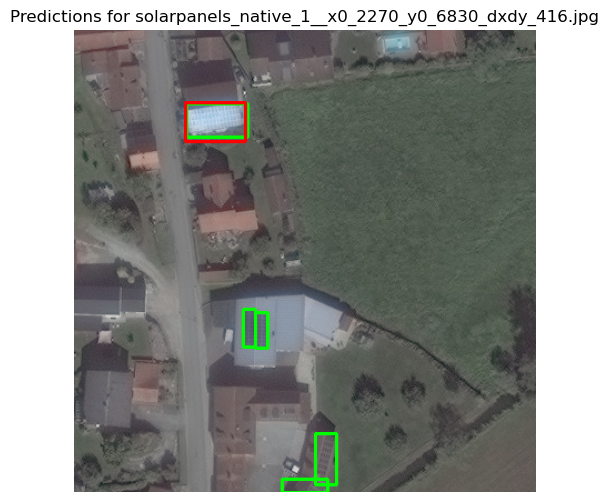

In [149]:
"""Visualization of actual vs predicted solar panel locations."""


MODEL_PATH = r"C:\Users\HP\runs\detect\train4\weights\best.pt"  
model = YOLO(MODEL_PATH)


TEST_IMAGES_DIR = r"C:\Users\HP\Downloads\iloveimg-converted"
TEST_LABELS_DIR = r"C:\Users\HP\Downloads\iloveimg-converted\labels1"


test_images = [f for f in os.listdir(TEST_IMAGES_DIR) if f.endswith(".jpg")]
random_images = random.sample(test_images, min(3, len(test_images)))  


def load_ground_truth(label_path, img_w, img_h):
    gt_boxes = []
    if os.path.exists(label_path):
        print(f" Found label file: {label_path}")
        with open(label_path, "r") as file:
            for line in file:
                data = line.strip().split()
                if len(data) < 5:
                    print(f" Skipping invalid label: {line.strip()}")
                    continue
                
                class_id, x_center, y_center, width, height = map(float, data)
                
                x1 = int((x_center - width / 2) * img_w)
                y1 = int((y_center - height / 2) * img_h)
                x2 = int((x_center + width / 2) * img_w)
                y2 = int((y_center + height / 2) * img_h)
                
                gt_boxes.append((x1, y1, x2, y2))
    else:
        print(f" Label file NOT FOUND: {label_path}")
    
    return gt_boxes


for img_file in random_images:
    img_path = os.path.join(TEST_IMAGES_DIR, img_file)
    label_path = os.path.join(TEST_LABELS_DIR, img_file.replace(".jpg", ".txt"))

    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

   
    img_h, img_w, _ = img.shape
    print(f"Image: {img_file} | Shape: {img_w}x{img_h}")

    
    gt_boxes = load_ground_truth(label_path, img_w, img_h)

   
    results = model(img_path)[0]  
    pred_boxes = results.boxes.xyxy.cpu().numpy()  

   
    for (x1, y1, x2, y2) in gt_boxes:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    
    for (x1, y1, x2, y2) in pred_boxes:
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

   
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predictions for {img_file}")
    plt.show()


In [82]:

"""Precision, Recall, and F1-score Table"""


def compute_iou(box1, box2):
    """Calculate Intersection over Union (IoU) between two bounding boxes."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    
    intersection = max(0, x2 - x1) * max(0, y2 - y1)

    
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    
    union = box1_area + box2_area - intersection

    return intersection / (union + 1e-8)  


iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]


metrics_table = []

for iou_thresh in iou_thresholds:
    for conf_thresh in conf_thresholds:
        
        valid_preds = pred_scores >= conf_thresh
        filtered_boxes = pred_boxes[valid_preds]
        filtered_labels = pred_labels[valid_preds]
        filtered_scores = pred_scores[valid_preds]

        
        tp = 0
        fp = 0
        fn = 0

        matched_gt = set()  

        
        for pred_idx, pred_box in enumerate(filtered_boxes):
            pred_label = filtered_labels[pred_idx]
            best_iou = 0
            best_gt_idx = -1

            for gt_idx, gt_box in enumerate(gt_boxes):
                gt_label = gt_labels[gt_idx]
                iou = compute_iou(pred_box, gt_box)

                
                if iou > best_iou and iou >= iou_thresh and gt_idx not in matched_gt:
                    best_iou = iou
                    best_gt_idx = gt_idx

            if best_gt_idx != -1 and filtered_labels[pred_idx] == gt_labels[best_gt_idx]:
                tp += 1
                matched_gt.add(best_gt_idx)
            else:
                fp += 1  

        fn = len(gt_boxes) - len(matched_gt)  

        
        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)

        
        metrics_table.append([iou_thresh, conf_thresh, precision, recall, f1_score])


df = pd.DataFrame(metrics_table, columns=["IoU", "Confidence", "Precision", "Recall", "F1-Score"])


print(df)


    IoU  Confidence  Precision    Recall  F1-Score
0   0.1         0.1   0.716216  0.339744  0.460870
1   0.1         0.3   0.737705  0.288462  0.414747
2   0.1         0.5   0.909091  0.128205  0.224719
3   0.1         0.7   1.000000  0.025641  0.050000
4   0.1         0.9   0.000000  0.000000  0.000000
5   0.3         0.1   0.486486  0.230769  0.313043
6   0.3         0.3   0.524590  0.205128  0.294931
7   0.3         0.5   0.727273  0.102564  0.179775
8   0.3         0.7   1.000000  0.025641  0.050000
9   0.3         0.9   0.000000  0.000000  0.000000
10  0.5         0.1   0.378378  0.179487  0.243478
11  0.5         0.3   0.409836  0.160256  0.230415
12  0.5         0.5   0.500000  0.070513  0.123596
13  0.5         0.7   0.500000  0.012821  0.025000
14  0.5         0.9   0.000000  0.000000  0.000000
15  0.7         0.1   0.351351  0.166667  0.226087
16  0.7         0.3   0.393443  0.153846  0.221198
17  0.7         0.5   0.454545  0.064103  0.112360
18  0.7         0.7   0.500000 

In [78]:
"""Compute Evaluation Metrics
 Compute mAP50"""


model = YOLO(r"C:\Users\HP\runs\detect\train4\weights\best.pt")


VALIDATION_DIR = r"C:\Users\HP\Downloads\iloveimg-converted"  
image_paths = [os.path.join(VALIDATION_DIR, f) for f in os.listdir(VALIDATION_DIR) if f.endswith(".jpg")]


LABEL_DIR = (r"C:\Users\HP\Downloads\iloveimg-converted\labels1")

pred_boxes, pred_scores, pred_labels = [], [], []
gt_boxes, gt_labels = [], []


def compute_iou(box1, box2):
    x1, y1, x2, y2 = max(box1[0], box2[0]), max(box1[1], box2[1]), min(box1[2], box2[2]), min(box1[3], box2[3])
    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    union = (box1[2] - box1[0]) * (box1[3] - box1[1]) + (box2[2] - box2[0]) * (box2[3] - box2[1]) - intersection
    return intersection / (union + 1e-8)  


for img_path in image_paths:
    if not os.path.exists(img_path):
        print(f"Error: {img_path} not found!")
        continue

    results = model(img_path)[0]  

    if results.boxes.xyxy.numel() == 0:
        print(f"No detections in {img_path}")
        continue

    pred_boxes.append(results.boxes.xyxy.cpu().numpy())
    pred_scores.append(results.boxes.conf.cpu().numpy())
    pred_labels.append(results.boxes.cls.cpu().numpy())

    
    label_filename = os.path.basename(img_path).replace(".jpg", ".txt")
    label_path = os.path.join(LABEL_DIR, label_filename)

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f.readlines():
                data = list(map(float, line.strip().split()))
                class_id, x_center, y_center, width, height = data

                img_h, img_w = results.orig_shape
                x1 = int((x_center - width / 2) * img_w)
                y1 = int((y_center - height / 2) * img_h)
                x2 = int((x_center + width / 2) * img_w)
                y2 = int((y_center + height / 2) * img_h)

                gt_boxes.append([x1, y1, x2, y2])
                gt_labels.append(class_id)
    else:
        print(f"❌ Label file NOT FOUND: {label_path}")


if len(pred_boxes) > 0:
    pred_boxes = np.concatenate(pred_boxes, axis=0)
    pred_scores = np.concatenate(pred_scores, axis=0)
    pred_labels = np.concatenate(pred_labels, axis=0)
else:
    print("No predictions were made!")
    pred_boxes, pred_scores, pred_labels = np.array([]), np.array([]), np.array([])

gt_boxes = np.array(gt_boxes)
gt_labels = np.array(gt_labels)


def compute_ap(pred_boxes, pred_labels, pred_scores, gt_boxes, gt_labels, iou_threshold=0.1):
    """Compute Average Precision (AP) at IoU threshold."""
    sorted_indices = np.argsort(-pred_scores)  
    pred_boxes, pred_labels, pred_scores = pred_boxes[sorted_indices], pred_labels[sorted_indices], pred_scores[sorted_indices]

    tp = np.zeros(len(pred_boxes))
    fp = np.zeros(len(pred_boxes))
    matched_gt = set()

    for i, pred_box in enumerate(pred_boxes):
        pred_label = pred_labels[i]
        best_iou = 0
        best_gt_idx = -1

        for gt_idx, gt_box in enumerate(gt_boxes):
            gt_label = gt_labels[gt_idx]
            if gt_label != pred_label:  
                continue

            iou = compute_iou(pred_box, gt_box)

            if iou > best_iou and iou >= iou_threshold and gt_idx not in matched_gt:
                best_iou = iou
                best_gt_idx = gt_idx

        if best_gt_idx != -1:
            tp[i] = 1
            matched_gt.add(best_gt_idx)
        else:
            fp[i] = 1

    
    tp_cumsum = np.cumsum(tp)
    fp_cumsum = np.cumsum(fp)
    recall = tp_cumsum / (len(gt_boxes) + 1e-8)
    precision = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-8)

   
    ap = np.trapz(precision, recall) 
    return ap


map50 = compute_ap(pred_boxes, pred_labels, pred_scores, gt_boxes, gt_labels, iou_threshold=0.1)

print(f"mAP@50: {map50:.4f}")



image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2149_y0_9296_dxdy_416.jpg: 416x416 1 solar_panel, 36.4ms
Speed: 1.2ms preprocess, 36.4ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2149_y0_9296_dxdy_416_1.jpg: 416x416 1 solar_panel, 34.4ms
Speed: 1.0ms preprocess, 34.4ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)
❌ Label file NOT FOUND: C:\Users\HP\Downloads\iloveimg-converted\labels1\solarpanels_native_1__x0_2149_y0_9296_dxdy_416_1.txt

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2157_y0_6222_dxdy_416.jpg: 416x416 1 solar_panel, 31.5ms
Speed: 1.0ms preprocess, 31.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 C:\Users\HP\Downloads\iloveimg-converted\solarpanels_native_1__x0_2157_y0_6222_dxdy_416_1.jpg: 416x416 (no detections), 33.0ms
Speed: 0.0ms preprocess, 33.0ms inference